# Validation Loss Stability

In [2]:
import sys
sys.path.append("..")

import numpy as np
import matplotlib.pyplot as plt

from herec.reader import *

## Basic Staristics

In [59]:
class statistician:

    def print_entity_num(self):

        # User/Item #
        user_num = self.df_RAW.get_column("user_id").n_unique()
        print("User #:", user_num)
        item_num = self.df_RAW.get_column("item_id").n_unique()
        print("Item #:", item_num)

        return self

    def print_interactions_by_users(self):

        # Interaction Times by users
        times = self.df_RAW.get_column("user_id").value_counts().get_column("counts").to_numpy()
        fig, ax = plt.subplots(figsize=(4, 2))
        ax.hist( times, bins=50 )
        ax.set_xlabel("Interaction #")
        ax.set_ylabel("User #")
        plt.tight_layout()
        plt.show()

        return self

    def print_interactions_by_items(self):

        # Interaction Times by items
        times = self.df_RAW.get_column("item_id").value_counts().get_column("counts").to_numpy()
        fig, ax = plt.subplots(figsize=(4, 2))
        ax.hist( times, bins=50 )
        ax.set_xlabel("Interaction #")
        ax.set_ylabel("Item #")
        plt.tight_layout()
        plt.show()

        return self

    def print_rating_counts(self):

        count_df = self.df_RAW.get_column("rating").value_counts()
        fig, ax = plt.subplots(figsize=(4, 2))
        ax.bar( count_df.get_column("rating"), count_df.get_column("counts") )
        ax.set_xlabel("Rating")
        ax.set_ylabel("Interaction #")
        plt.tight_layout()
        plt.show()

        return self

    def __init__(self, reader):

        # Take out df_RAW
        df_RAW = reader.df_RAW

        # Drop Duclicated Interaction
        df_RAW = df_RAW.unique(["user_id", "item_id"])

        # Set
        self.df_RAW = df_RAW    

        # Print
        self.print_entity_num()
        self.print_interactions_by_users()
        self.print_interactions_by_items()
        self.print_rating_counts()

User #: 943
Item #: 1682


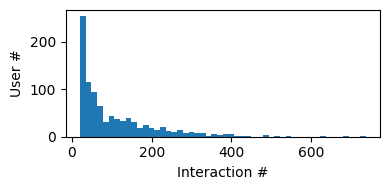

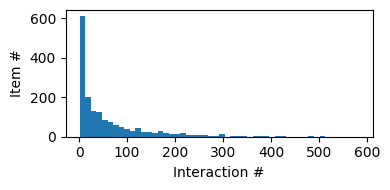

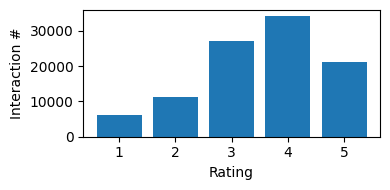

In [63]:
statistician( ML100K() )

User #: 6040
Item #: 3706


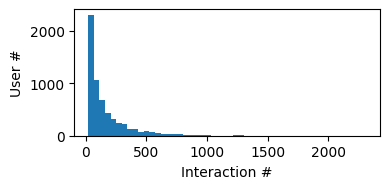

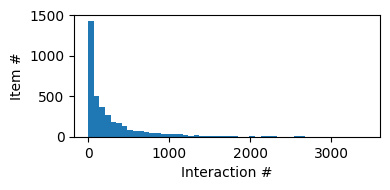

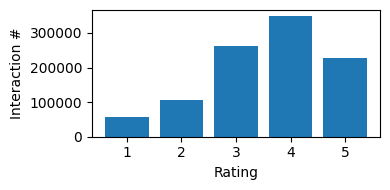

In [64]:
statistician( ML1M() )

User #: 2248
Item #: 16861


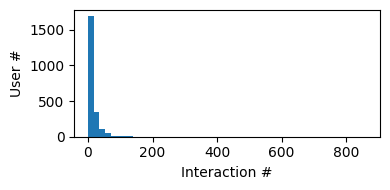

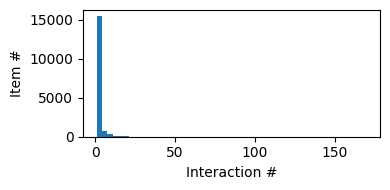

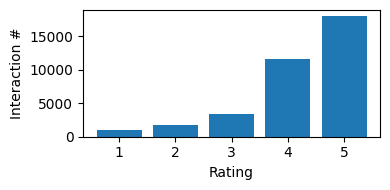

In [65]:
statistician( Ciao_PART() )

User #: 7375
Item #: 105114


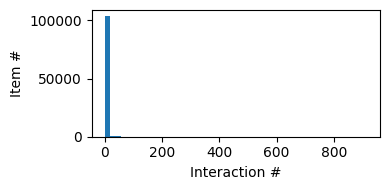

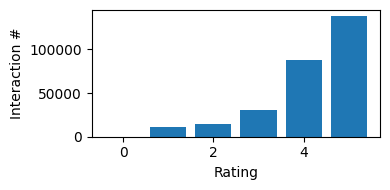

In [66]:
statistician( Ciao() )